# Cap. 6 - NumPy


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Leitura e escrita arrays em arquivos

### `np.savetxt`

Essa função serve para salvar arrays do numpy como arquivos de texto.

Ela tem os seguintes parâmetros (são basicamente os mesmos da `np.loadtxt`):

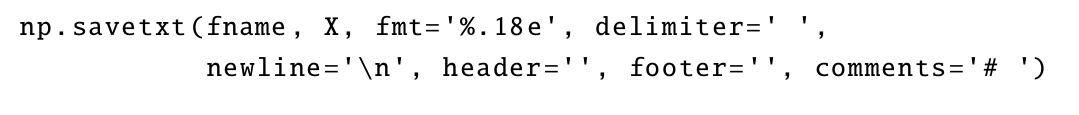

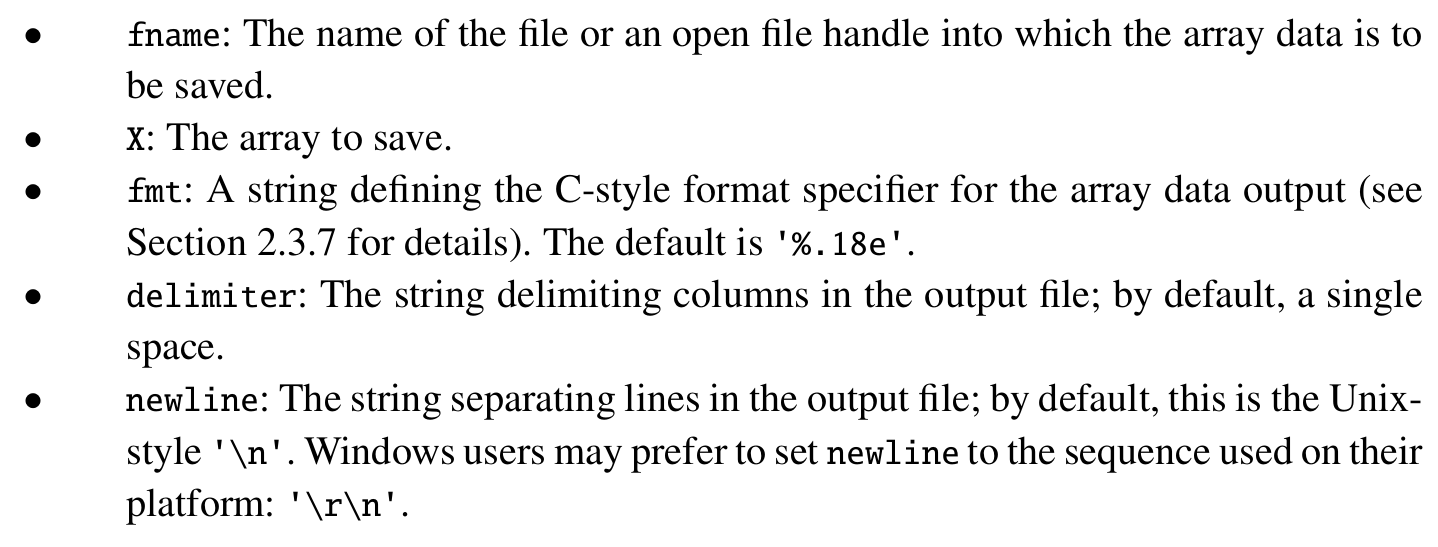

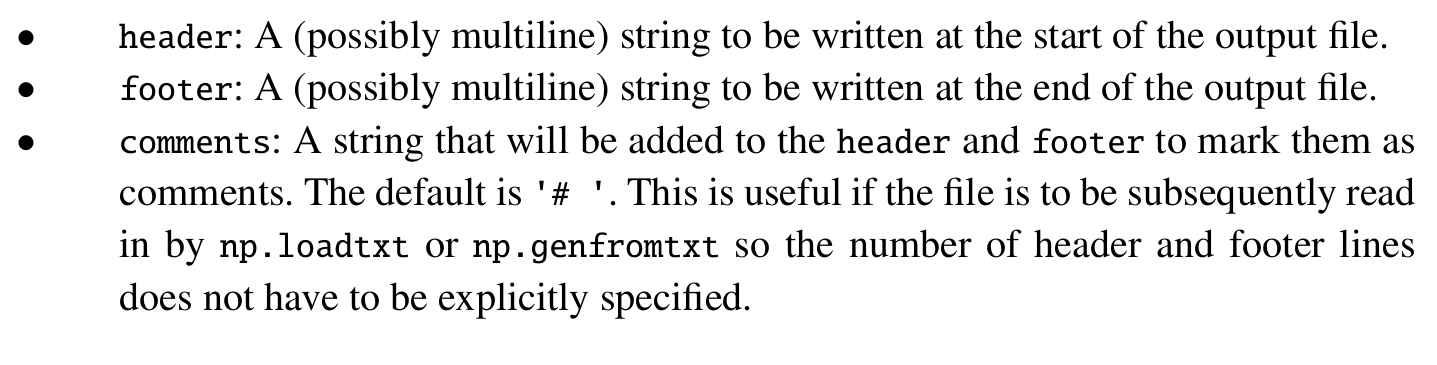

*Exemplo E6.8:* Simulação de decaimento radioativo.

Uma maneira de simular esse processo é considerar um período de tempo dividido em intervalos de tamanho $\Delta T$, com $\Delta T\ll\tau$, sendo $\tau$ o chamado tempo de vida. Além disso,

$$
\tau = \frac{t_{1/2}}{\ln 2}
$$
com $t_{1/2}$ sendo o chamado tempo de meia vida.

Nesse sentido, a probabilidade de que um um núcleo decair num dado intervalo de tempo é independente do tempo e igual a

$$
p = \frac{\Delta t}{\tau}
$$

Assim, podemos simular esse processo fazendo:

-  um loop sobre núcleos que não decaíram em tempos anteriores;
- sorteando um número aleatório uniforme no intervalo [0,1);
- e verificando se o número sorteado é menor que $p$, caso em que o núcleo passa ser considerado como decaído.

Vejam o código abaixo:

In [ ]:
import numpy as np
import random

In [ ]:
def decay_sim(thalf, N0=500, tgrid=None, nhalflives=4):
    """Simula o decaimento radioativo de N0 núcleos.

    thalf: tempo de meia vida;
    N0: número de núcleos;
    tgrid: array com o lista de intervalos de tempo igualmente espaçado
           (se None, tgrid é gerado);
    nhalflives: número de tempos de meia vida usado para gerar o tgrid.

    """

    # calcula o tempo de vida do núcleo usando thalf
    tau = thalf / np.log(2)

    if tgrid is None:
        # cria um grid com Nt pontos até o tmax = thalf * nhalflives
        Nt, tmax = 100, thalf * nhalflives
        tgrid, dt = np.linspace(0, tmax, Nt, retstep=True)
    else:
        # se tgrid foi passado como parâmetro, obtém Nt e dt
        Nt = len(tgrid)
        dt = tgrid[1] - tgrid[0]

    # array com o número de núcleos não decaídos em cada passo
    N = np.empty(Nt, dtype=int)

    # no passo zero, não temos decaimento.
    N[0] = N0

    # define a probabilidade de ocorrer um decaimento no intervalo dt
    p = dt / tau

    #loop sobre todos os intervalos
    for i in range(1, Nt):
        # para para intervalo, usa o número que núcleos não decaídos do passo
        # anterior
        N[i] = N[i-1]

        # considera a possibilidade de núcleo não decaído decair no atual
        # intervalo de tempo
        for j in range(N[i-1]):
            r = random.random()
            if r < p:
                # ocorreu um decaimento, então diminui 1 naqueles não decaídos
                N[i] -= 1

    #retorna o grid de tempos e o array com o número de decaimentos
    return tgrid, N

In [ ]:
# carbono-14 tem 5730 anos de meia vida
decay_sim(5730)

(array([    0.        ,   231.51515152,   463.03030303,   694.54545455,
          926.06060606,  1157.57575758,  1389.09090909,  1620.60606061,
         1852.12121212,  2083.63636364,  2315.15151515,  2546.66666667,
         2778.18181818,  3009.6969697 ,  3241.21212121,  3472.72727273,
         3704.24242424,  3935.75757576,  4167.27272727,  4398.78787879,
         4630.3030303 ,  4861.81818182,  5093.33333333,  5324.84848485,
         5556.36363636,  5787.87878788,  6019.39393939,  6250.90909091,
         6482.42424242,  6713.93939394,  6945.45454545,  7176.96969697,
         7408.48484848,  7640.        ,  7871.51515152,  8103.03030303,
         8334.54545455,  8566.06060606,  8797.57575758,  9029.09090909,
         9260.60606061,  9492.12121212,  9723.63636364,  9955.15151515,
        10186.66666667, 10418.18181818, 10649.6969697 , 10881.21212121,
        11112.72727273, 11344.24242424, 11575.75757576, 11807.27272727,
        12038.78787879, 12270.3030303 , 12501.81818182, 12733.33

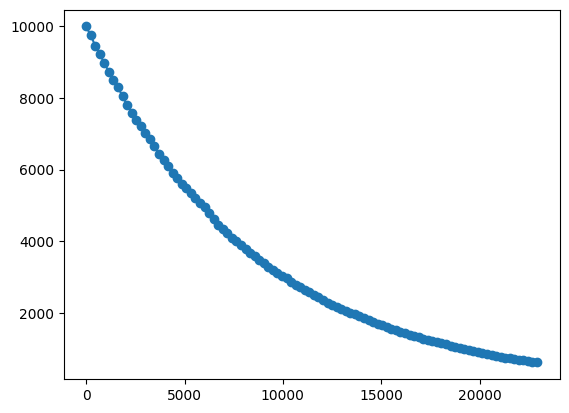

In [ ]:
tempo,count = decay_sim(5730,N0=10000)
plt.plot(tempo,count,'-o')

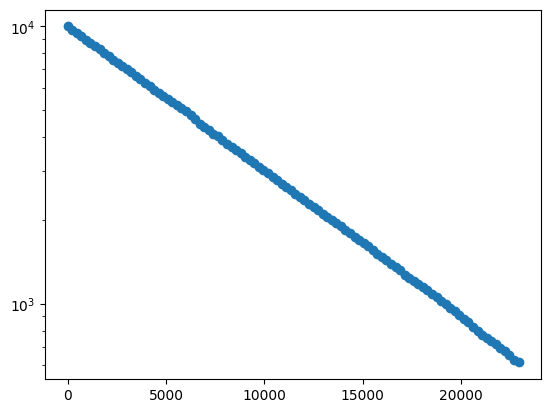

In [ ]:
plt.semilogy(tempo,count,'-o')

Text(0, 0.5, 'Número de núcleos')

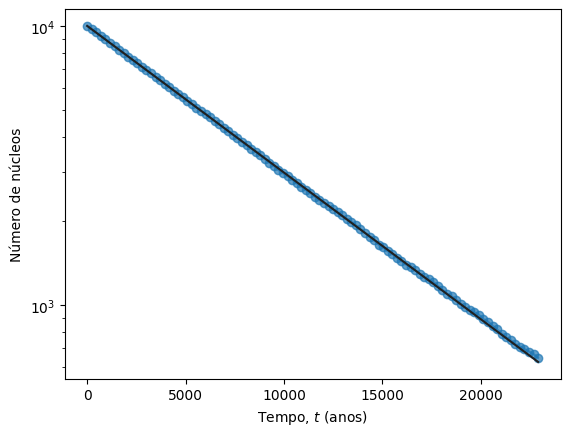

In [ ]:
N0=10000
thalf = 5730
tau = thalf / np.log(2)

tempo,count = decay_sim(5730,N0=N0)
plt.semilogy(tempo,count,'-o',alpha=0.7)

teorico = N0*np.exp(-tempo/tau)
plt.semilogy(tempo,teorico,'-',color='#202020')
plt.xlabel("Tempo, $t$ (anos)")
plt.ylabel("Número de núcleos")

In [ ]:
N0 = 500
thalf = 5730

Nt, tmax = 100, 20000
tgrid = np.linspace(0, tmax, Nt)

nsims = 10
Nsim = np.empty((Nt, nsims))

for i in range(nsims):
    _, Nsim[:, i] = decay_sim(thalf, N0, tgrid)

In [ ]:
tgrid

array([    0.        ,   202.02020202,   404.04040404,   606.06060606,
         808.08080808,  1010.1010101 ,  1212.12121212,  1414.14141414,
        1616.16161616,  1818.18181818,  2020.2020202 ,  2222.22222222,
        2424.24242424,  2626.26262626,  2828.28282828,  3030.3030303 ,
        3232.32323232,  3434.34343434,  3636.36363636,  3838.38383838,
        4040.4040404 ,  4242.42424242,  4444.44444444,  4646.46464646,
        4848.48484848,  5050.50505051,  5252.52525253,  5454.54545455,
        5656.56565657,  5858.58585859,  6060.60606061,  6262.62626263,
        6464.64646465,  6666.66666667,  6868.68686869,  7070.70707071,
        7272.72727273,  7474.74747475,  7676.76767677,  7878.78787879,
        8080.80808081,  8282.82828283,  8484.84848485,  8686.86868687,
        8888.88888889,  9090.90909091,  9292.92929293,  9494.94949495,
        9696.96969697,  9898.98989899, 10101.01010101, 10303.03030303,
       10505.05050505, 10707.07070707, 10909.09090909, 11111.11111111,
      

In [ ]:
# cada coluna é o resultado de uma simulação
Nsim

array([[500., 500., 500., 500., 500., 500., 500., 500., 500., 500.],
       [486., 491., 488., 490., 482., 484., 491., 493., 486., 488.],
       [469., 474., 474., 478., 474., 471., 476., 481., 465., 471.],
       [455., 453., 463., 467., 465., 454., 466., 471., 456., 463.],
       [438., 445., 453., 460., 456., 445., 457., 462., 447., 451.],
       [427., 436., 442., 452., 443., 435., 448., 450., 434., 435.],
       [421., 427., 435., 443., 428., 428., 439., 432., 428., 424.],
       [416., 415., 423., 439., 422., 416., 428., 417., 419., 414.],
       [411., 411., 410., 428., 409., 404., 415., 411., 412., 407.],
       [404., 403., 401., 416., 398., 391., 405., 404., 400., 396.],
       [397., 393., 388., 411., 388., 383., 395., 394., 393., 382.],
       [385., 385., 375., 396., 372., 377., 382., 385., 381., 375.],
       [379., 377., 372., 380., 360., 367., 366., 376., 373., 367.],
       [371., 369., 359., 371., 348., 356., 356., 370., 362., 359.],
       [367., 360., 353., 363., 34

Text(0, 0.5, 'Número de núcleos')

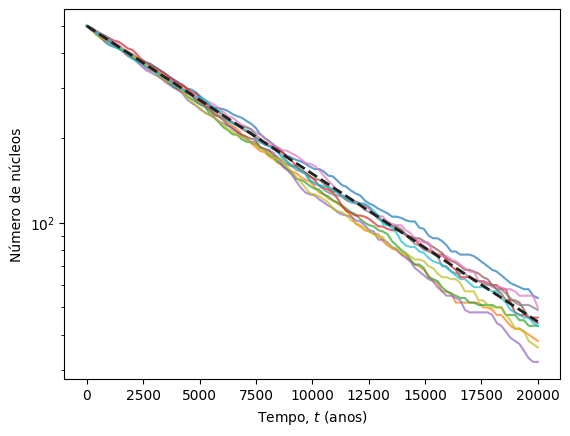

In [ ]:
N0 = 500
thalf = 5730

Nt, tmax = 100, 20000
tgrid = np.linspace(0, tmax, Nt)

for i in range(nsims):
    plt.semilogy(tgrid,Nsim[:, i],'-',alpha=0.7)

teorico = N0*np.exp(-tgrid/tau)
plt.semilogy(tgrid,teorico,'--',color='#202020',lw=2)
plt.xlabel("Tempo, $t$ (anos)")
plt.ylabel("Número de núcleos")

In [ ]:
np.hstack((tgrid[:, None], Nsim))

array([[    0.        ,   500.        ,   500.        , ...,
          500.        ,   500.        ,   500.        ],
       [  202.02020202,   486.        ,   491.        , ...,
          493.        ,   486.        ,   488.        ],
       [  404.04040404,   469.        ,   474.        , ...,
          481.        ,   465.        ,   471.        ],
       ...,
       [19595.95959596,    58.        ,    40.        , ...,
           51.        ,    38.        ,    46.        ],
       [19797.97979798,    55.        ,    39.        , ...,
           50.        ,    37.        ,    44.        ],
       [20000.        ,    54.        ,    38.        , ...,
           49.        ,    36.        ,    43.        ]])

In [ ]:
np.savetxt('14C-sim.csv', np.hstack((tgrid[:, None], Nsim)),
           fmt = '%d', delimiter=',',
           header=f'tempo,'+','.join([f'sim{i+1}' for i in range(10)])
           )

## Métodos estatísticos

### Estatísticas de ordenamento

**Mínimos e máximos**

- `np.min` e `np.nanmin`: valor mínimo da array;
- `np.max` e `np.nanmax`: valor máximo da array;
- `np.argmin` e `np.nanargmin`: índice do valor mínimo da array;
- `np.argmax` e `np.nanargmax`: índice do valor máximo da array;


In [ ]:
a = np.sqrt(np.linspace(-2, 2, 4))
a

<ipython-input-15-c5757effc2ba>:1: RuntimeWarning: invalid value encountered in sqrt
  a = np.sqrt(np.linspace(-2, 2, 4))


array([       nan,        nan, 0.81649658, 1.41421356])

In [ ]:
np.min(a),np.max(a)

(nan, nan)

In [ ]:
np.nanmin(a),np.nanmax(a)

(0.8164965809277259, 1.4142135623730951)

In [ ]:
#retorna a posição dos nans!
np.argmin(a), np.argmax(a)

(0, 0)

In [ ]:
np.nanargmin(a), np.nanargmax(a)

(2, 3)

- `np.minimum` e `np.maximum`: mínimos e máximos entre dois arrays elemento a elemento;
- `np.fmin` e `np.fmax`: mínimos e máximos entre dois arrays elemento a elemento, ignorando nans;

In [ ]:
np.minimum([1,     -5,  6,  2],
           [0, np.nan, -1, -1])

array([ 0., nan, -1., -1.])

In [ ]:
np.maximum([1,     -5,  6,  2],
           [0, np.nan, -1, -1])

array([ 1., nan,  6.,  2.])

In [ ]:
np.fmin([1,     -5,  6,  2],
        [0, np.nan, -1, -1])

array([ 0., -5., -1., -1.])

In [ ]:
np.fmax([1,     -5,  6,  2],
        [0, np.nan, -1, -1])

array([ 1., -5.,  6.,  2.])

**Percentis**

Considerando um dado em ordem crescente, dividido em 100 partes, com cada parte tendo aproximadamente a mesma fração dos dados, temos que:

- O percentil $q=1$ determina o valor limite para o qual temos 1\% dos dados menores;
- ...
- O percentil $q=99$ determina o valor limite para o qual temos 99\% dos dados menores (ou 1\% maior: top 1\%);

Para $q=50$ temos a mediana, o valor para o qual 50\% dados são maiores e 50\% são menores.

* $q=10,20,\dots,90$ formam os decis;

* $q=25,50,75$ formam os quartis;

Para calcular esse quantidade usamos o `np.percentile(a, q)`


In [ ]:
a = np.array([[0., 0.6 , 1.2],
              [1.8, 2.4, 3.0]])

In [ ]:
np.percentile(a, 50)

1.5

Note que 1.5 não existe no array. Isso acontece porque a divisão em $q=50$ não é exata, pois temos um número par de pontos. Nesse caso, 1.5 é média entre $1.2$ e $1.8$

In [ ]:
np.sort(a.flatten())

array([0. , 0.6, 1.2, 1.8, 2.4, 3. ])

In [ ]:
(1.2+1.8)/2.

1.5

In [ ]:
np.median(a)

1.5

In [ ]:
#podemos usar o axis
np.percentile(a, 50, axis=1) # entre as colunas (eixo horizontal)

array([0.6, 2.4])

In [ ]:
np.percentile(a, 50, axis=0) # entre as linhas (eixo vertical)

array([0.9, 1.5, 2.1])

### Média, variância e correlação


**Médias**

- `np.mean`: média aritmética;
- `np.average`: média ponderada: $ \sum w_i x_i / \sum w_i$;

- `np.median`: mediana.

In [ ]:
x = np.array([1., 4., 9., 16.])

In [ ]:
np.mean(x),np.median(x)

(7.5, 6.5)

In [ ]:
np.average(x, weights=[0., 3., 1., 0.])

5.25

**Variância e desvio padrão**

- `np.std` e `np.nanstd`: desvio padrão $\sigma$;
- `np.var` e `np.nanvar`: variância $\sigma^2$.

$$
\sigma^2 = \frac{1}{N} \sum_i (x_i-\mu)^2
$$


In [ ]:
x = np.array([1., 2., 3., 4.])
np.std(x)

1.118033988749895

In [ ]:
np.random.normal(loc=10,scale=2,size=10)

array([11.55114588,  8.36188398, 12.5729934 , 11.60878786,  9.72996264,
       11.12887843,  8.33811845,  8.87412409,  9.95400572,  9.80308347])

In [ ]:
#loc=média, scale=desvio padrão
mu10_std2 = np.random.normal(loc=10,scale=2,size=1000)

mu1_std10 = np.random.normal(loc=1,scale=10,size=1000)

In [ ]:
np.mean(mu10_std2),np.std(mu10_std2)

(9.871707227572147, 1.984834445493393)

In [ ]:
np.mean(mu1_std10),np.std(mu1_std10)

(0.830568191448439, 9.980920087824625)

In [ ]:
np.var(mu1_std10), np.std(mu1_std10)**2

(99.61876579954114, 99.61876579954112)

**Covariância**

É um medida entre pares de variáveis ($x$ e $y$):

$$
cov(x,y) = \frac{1}{N-1}\sum_k (x_k-\mu_x)(y_k-\mu_y)
$$

- $cov(x,y)>0$ quando valores de $x$ e $y$ são frequentemente simultaneamentes maiores ou menores que suas respectivas médias ($\mu_x$ e $\mu_y$)

- $cov(x,y)<0$ quando valores de $x$ são frequentemente maiores que sua média enquanto os valores de $y$ são simultaneamente menores que sua média, ou vice-versa.

- $cov(x,y)\approx0$ quando valores de $x$ e $y$ superam ou não sua médias de maneira não relacionada.

Note que $cov(x,x) = \sigma^2$ (se $N\gg1$).

*Exemplo E6.9:* Matriz de covariância.

In [ ]:
X = np.array ([[0.1, 0.3, 0.4, 0.8, 0.9],
               [3.2, 2.4, 2.4, 0.1, 5.5],
               [10., 8.2, 4.3, 2.6, 0.9]
              ])

In [ ]:
covM = np.cov(X)
covM

array([[ 0.115 ,  0.0575, -1.2325],
       [ 0.0575,  3.757 , -0.8775],
       [-1.2325, -0.8775, 14.525 ]])

In [ ]:
X[0,:]

array([0.1, 0.3, 0.4, 0.8, 0.9])

In [ ]:
#linha 0, coluna 1
print(np.sum((X[0,:]-np.mean(X[0,:]))*(X[1,:]-np.mean(X[1,:])))/(5-1))
#linha 0, coluna 2
print(np.sum((X[0,:]-np.mean(X[0,:]))*(X[2,:]-np.mean(X[2,:])))/(5-1))

0.05749999999999997
-1.2325


Note que a matriz é simétrica:

In [ ]:
#linha 1, coluna 0
np.sum((X[1,:]-np.mean(X[1,:]))*(X[0,:]-np.mean(X[0,:])))/(5-1)

0.05749999999999997

In [ ]:
#diagonal é a variância
np.sum((X[0,:]-np.mean(X[0,:]))*(X[0,:]-np.mean(X[0,:])))/(5-1)

0.11500000000000002

In [ ]:
#só não é exatamente igual por conta do denominador (5-1)
np.var(X[0,:]),np.sum((X[0,:]-np.mean(X[0,:]))*(X[0,:]-np.mean(X[0,:])))/(5-0)

(0.09200000000000001, 0.09200000000000001)

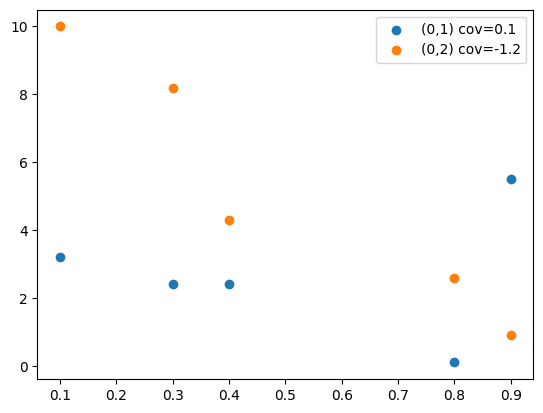

In [ ]:
plt.scatter(X[0,:],X[1,:],label=f"(0,1) cov={covM[0,1]:.1f}")
plt.scatter(X[0,:],X[2,:],label=f"(0,2) cov={covM[0,2]:.1f}")
plt.legend()

**Coeficiente de correlação (de Pearson)**

$$
r = \frac{cov(x,y)}{\sigma_x \sigma_y}
$$

- $r=1$: relação linear crescente perfeita entre $x$ e $y$;
- $r=-1$: relação linear decrescente perfeita entre $x$ e $y$;
- $r=0$: $x$ e $y$ não são linearmente relacionados;

In [ ]:
np.corrcoef(X)
#note o valores negativos próximos de -1

array([[ 1.        ,  0.0874779 , -0.95363007],
       [ 0.0874779 ,  1.        , -0.11878687],
       [-0.95363007, -0.11878687,  1.        ]])

*Exemplo:* Diferentes valores de $r$.

array([[1.        , 0.98121411],
       [0.98121411, 1.        ]])

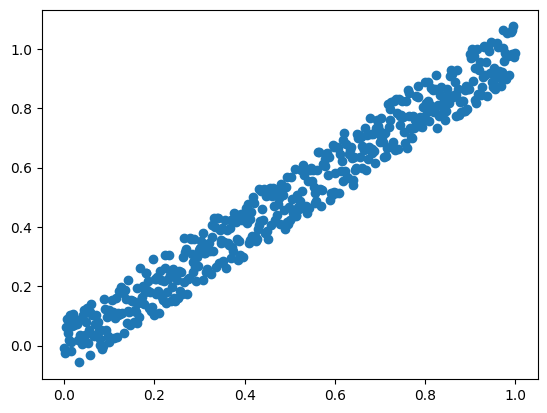

In [ ]:
x = np.linspace(0,1,num=500)
y = x + 0.1*np.random.uniform(-1,1,size=500)

plt.scatter(x,y)

np.corrcoef([x,y])

array([[ 1.        , -0.98102333],
       [-0.98102333,  1.        ]])

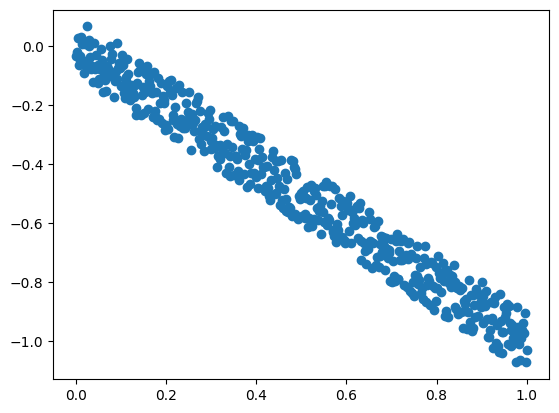

In [ ]:
x = np.linspace(0,1,num=500)
y = -x + 0.1*np.random.uniform(-1,1,size=500)

plt.scatter(x,y)

np.corrcoef([x,y])

array([[ 1.        , -0.02319385],
       [-0.02319385,  1.        ]])

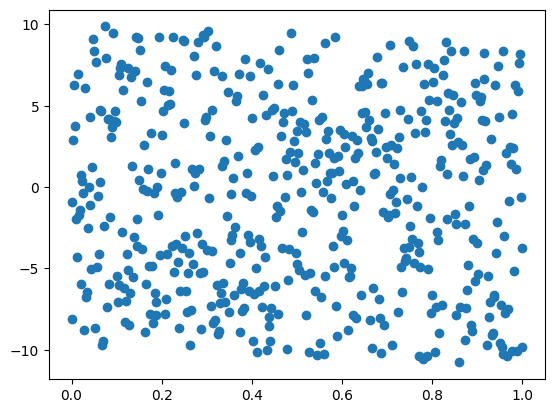

In [ ]:
x = np.linspace(0,1,num=500)
y = -x + 10*np.random.uniform(-1,1,size=500)

plt.scatter(x,y)

np.corrcoef([x,y])

*Exemplo E6.10* Correlação entre temperatura e pressão do ar com dados do [*Cambridge University Digital Technology Group*](https://www.cl.cam.ac.uk/weather/)



In [ ]:
!wget https://www.cl.cam.ac.uk/weather/weather-raw.csv

--2024-01-23 23:40:06--  https://www.cl.cam.ac.uk/weather/weather-raw.csv
Resolving www.cl.cam.ac.uk (www.cl.cam.ac.uk)... 128.232.0.20, 2a05:b400:110::80:14
Connecting to www.cl.cam.ac.uk (www.cl.cam.ac.uk)|128.232.0.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24569671 (23M) [application/octet-stream]
Saving to: ‘weather-raw.csv’

weather-raw.csv     100%[===================>]  23.43M  14.7MB/s    in 1.6s    

2024-01-23 23:40:08 (14.7 MB/s) - ‘weather-raw.csv’ saved [24569671/24569671]



In [ ]:
!head weather-raw.csv

1995-06-30 15:00:00,295,43,156,1013,14,225,1044,0,14
1995-06-30 15:30:00,305,36,140,1013,13,315,50,0,13
1995-06-30 16:00:00,311,41,163,1013,12,315,51,0,12
1995-06-30 16:30:00,322,43,181,1013,2,315,50,0,2
1995-06-30 17:00:00,327,41,178,1013,8,225,51,0,8
1995-06-30 17:30:00,322,43,181,1012,17,0,51,0,17
1995-06-30 18:00:00,316,44,177,1013,34,45,50,0,34
1995-06-30 18:30:00,305,46,175,1013,28,45,51,0,28
1995-06-30 19:00:00,247,60,163,1014,80,0,51,0,80
1995-06-30 19:30:00,204,64,133,1015,83,0,23,0,83


In [ ]:
!tail weather-raw.csv

2023-10-18 10:30:00,127,74,82,998,78,90,0,0,200
2023-10-18 11:00:00,127,72,78,998,87,90,0,0,260
2023-10-18 11:30:00,132,73,85,996,84,90,0,0,220
2023-10-18 12:00:00,132,73,85,996,66,90,0,0,200
2023-10-18 12:30:00,136,75,92,995,50,90,0,10,180
2023-10-18 13:00:00,132,76,91,994,71,90,0,0,200
2023-10-18 13:30:00,136,76,94,994,66,90,0,20,200
2023-10-18 14:00:00,132,80,98,993,45,90,0,40,160
2023-10-18 14:30:00,132,75,89,992,77,90,0,0,240
2023-10-18 15:00:00,132,78,94,991,68,90,0,0,180


In [ ]:
#temperatura é a coluna 1, pressão é a 4
data = np.genfromtxt('weather-raw.csv', delimiter =',', usecols=(1, 4))

In [ ]:
len(data)

489543

In [ ]:
#verifica se temos nans
np.any(np.isnan(data))

True

In [ ]:
#verifica se T ou P são nans
np.any(np.isnan(data), axis=1)

array([False, False, False, ..., False, False, False])

In [ ]:
#remove os nans
data = data[~np.any(np.isnan(data), axis=1)]

In [ ]:
#T é reportado x10
data[:,0]

array([295., 305., 311., ..., 132., 132., 132.])

In [ ]:
data[:,0] = data[:,0]/10

In [ ]:
data[:,0]

array([29.5, 30.5, 31.1, ..., 13.2, 13.2, 13.2])

In [ ]:
data.T

array([[  29.5,   30.5,   31.1, ...,   13.2,   13.2,   13.2],
       [1013. , 1013. , 1013. , ...,  993. ,  992. ,  991. ]])

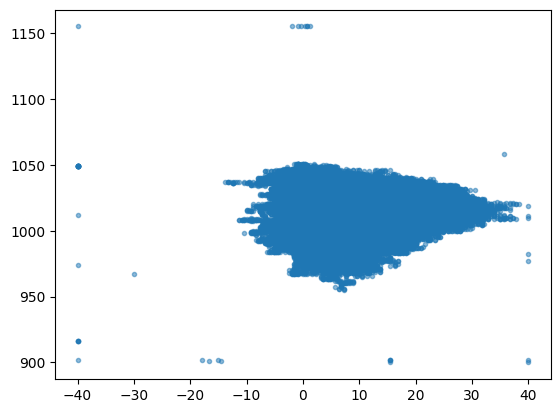

In [ ]:
plt.scatter(*data.T,alpha=0.5,marker='.')

(970.0, 1050.0)

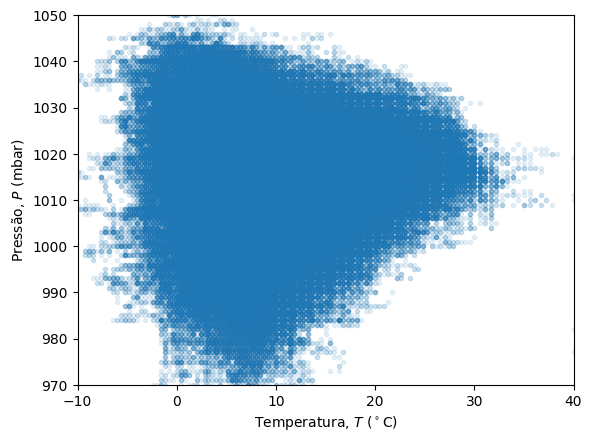

In [ ]:
plt.scatter(*data.T,alpha=0.1,marker='.')
plt.xlabel('Temperatura, $T$ ($\mathrm {^\circ C}$)')
plt.ylabel('Pressão, $P$ (mbar)')
plt.xlim(-10,40)
plt.ylim(970,1050)

In [ ]:
len(data)**2

239263809316

In [ ]:
data.T

In [ ]:
#notar o .T
corM = np.corrcoef(data.T)

In [ ]:
corM

array([[1.        , 0.02582792],
       [0.02582792, 1.        ]])

### Histogramas

`np.histogram`: calcula um histograma a partir de uma array.

Esse procedimento considera uma sequência de intervalos e conta o número de ocorrências em cada intervalo. Trata-se de uma abordagem para estimar a distribuição de dados.

Vejamos com um exemplo:

In [ ]:
notas = np.array([45, 68, 56, 23, 60, 87, 75, 59, 63, 72])

In [ ]:
bins = [20, 40, 60, 80, 100]
hist, bins = np.histogram(notas, bins)

In [ ]:
#[20–40), [40–60), [60–80) e [80–100]
hist

array([1, 3, 5, 1])

In [ ]:
bins

array([ 20,  40,  60,  80, 100])

In [ ]:
#podemos passar para bins o número de divisões
np.histogram(notas, bins=5)

(array([1, 1, 3, 3, 2]), array([23. , 35.8, 48.6, 61.4, 74.2, 87. ]))

In [ ]:
#também podemos passar o range para as partições
np.histogram(notas, bins=5, range=(0, 100))

(array([0, 1, 3, 5, 1]), array([  0.,  20.,  40.,  60.,  80., 100.]))

- o parâmetro `density=True` faz o retorno ser uma densidade de probabilidade

In [ ]:
density, bins = np.histogram(notas, bins=5, range=(0, 100), density=True)

In [ ]:
density*20

array([0. , 0.1, 0.3, 0.5, 0.1])

In [ ]:
bins

array([  0.,  20.,  40.,  60.,  80., 100.])

In [ ]:
#verifica se está normalizada
dx = bins[1]-bins[0]
np.sum(density*dx)

1.0

In [ ]:
contagem, bins = np.histogram(notas, bins=5, range=(0, 100), density=False)

In [ ]:
contagem, bins

(array([0, 1, 3, 5, 1]), array([  0.,  20.,  40.,  60.,  80., 100.]))

In [ ]:
len(bins),len(contagem)

In [ ]:
(bins[0:-1]+bins[1:])/2.

array([10., 30., 50., 70., 90.])

In [ ]:
centro_bin = (bins[0:-1]+bins[1:])/2.

Text(0, 0.5, 'Número de estudantes')

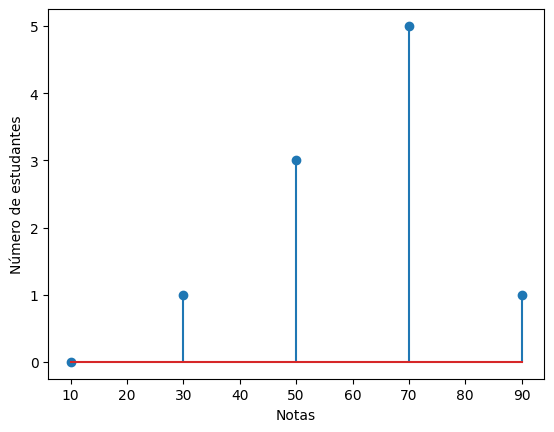

In [ ]:
plt.stem(centro_bin, contagem, bottom=0)

plt.xlabel('Notas')
plt.ylabel('Número de estudantes')

Text(0, 0.5, 'Número de estudantes')

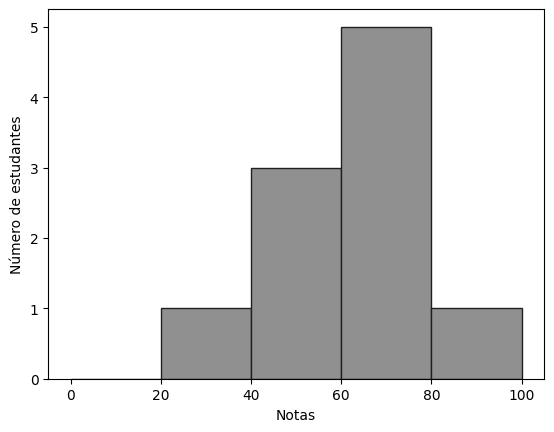

In [ ]:
hist , bins , patches = plt.hist(notas, bins=5,
                                 range=(0, 100),
                                 color='#909090',
                                 edgecolor='#202020')

plt.xlabel('Notas')
plt.ylabel('Número de estudantes')

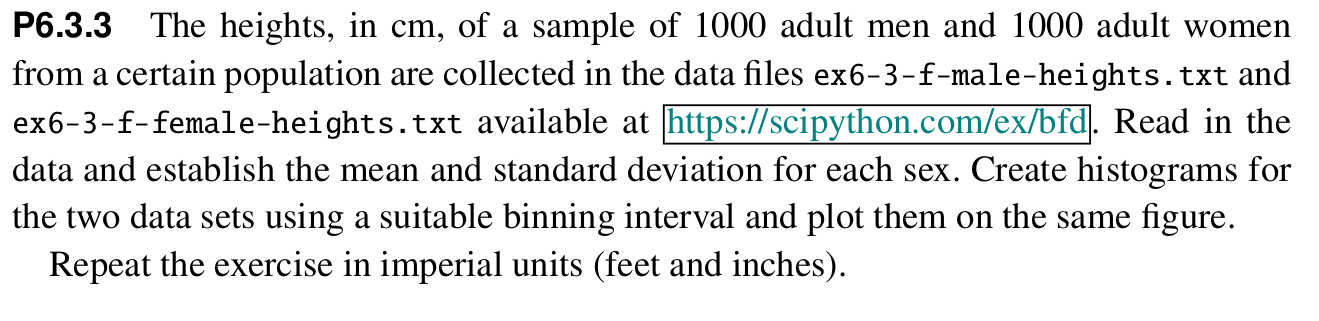

In [ ]:
!wget https://scipython.com/static/media/2/problems/P6.3/ex6-3-f-male-heights.txt
!wget https://scipython.com/static/media/2/problems/P6.3/ex6-3-f-female-heights.txt

--2024-01-23 23:58:55--  https://scipython.com/static/media/2/problems/P6.3/ex6-3-f-male-heights.txt
Resolving scipython.com (scipython.com)... 3.130.82.216
Connecting to scipython.com (scipython.com)|3.130.82.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6000 (5.9K) [text/plain]
Saving to: ‘ex6-3-f-male-heights.txt’

ex6-3-f-male-height 100%[===================>]   5.86K  --.-KB/s    in 0s      

2024-01-23 23:58:55 (256 MB/s) - ‘ex6-3-f-male-heights.txt’ saved [6000/6000]

--2024-01-23 23:58:55--  https://scipython.com/static/media/2/problems/P6.3/ex6-3-f-female-heights.txt
Resolving scipython.com (scipython.com)... 3.130.82.216
Connecting to scipython.com (scipython.com)|3.130.82.216|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6000 (5.9K) [text/plain]
Saving to: ‘ex6-3-f-female-heights.txt’

ex6-3-f-female-heig 100%[===================>]   5.86K  --.-KB/s    in 0s      

2024-01-23 23:58:55 (300 MB/s) - ‘ex6-3-f-female-he

In [ ]:
!head ex6-3-f-male-heights.txt

194.8 183.9 166.9 169.8 172.2
185.4 170.8 172.5 177.6 173.9
179.2 167.8 174.2 180.2 204.1
197.1 175.8 161.7 181.7 157.4
175.3 190.3 177.4 167.7 188.5
173.4 176.4 185.0 204.0 178.5
180.4 179.3 166.8 191.0 173.6
189.6 178.3 188.0 168.4 174.3
190.7 201.9 184.2 169.3 190.5
170.0 172.2 159.3 177.0 171.7


In [ ]:
!head ex6-3-f-female-heights.txt

161.7 160.5 152.6 150.8 157.7
159.2 165.2 167.3 158.2 161.5
158.2 141.6 179.9 159.7 162.8
167.2 169.4 160.2 160.8 166.4
168.0 157.4 167.4 177.8 153.7
160.6 155.4 167.3 152.8 160.1
171.3 174.6 167.2 160.8 158.6
152.8 176.5 147.7 171.2 158.0
164.9 163.3 173.4 167.2 155.1
175.9 159.3 163.5 173.3 154.7


In [ ]:
np.loadtxt('ex6-3-f-female-heights.txt')

array([[161.7, 160.5, 152.6, 150.8, 157.7],
       [159.2, 165.2, 167.3, 158.2, 161.5],
       [158.2, 141.6, 179.9, 159.7, 162.8],
       [167.2, 169.4, 160.2, 160.8, 166.4],
       [168. , 157.4, 167.4, 177.8, 153.7],
       [160.6, 155.4, 167.3, 152.8, 160.1],
       [171.3, 174.6, 167.2, 160.8, 158.6],
       [152.8, 176.5, 147.7, 171.2, 158. ],
       [164.9, 163.3, 173.4, 167.2, 155.1],
       [175.9, 159.3, 163.5, 173.3, 154.7],
       [161.2, 165.4, 179.9, 170.6, 158.8],
       [168.6, 168.2, 165.9, 155.9, 153.3],
       [160.2, 173.2, 171.3, 168.8, 155.1],
       [172.7, 161.4, 161.5, 162.3, 176. ],
       [165.4, 160.3, 162.2, 161.4, 156.8],
       [161. , 161.9, 175.3, 168.2, 170. ],
       [170.3, 160.3, 157.4, 157.6, 161.2],
       [155.7, 158.4, 170.2, 163.5, 172.7],
       [156.1, 159.9, 163.4, 161.7, 167.3],
       [162.5, 172.6, 162.2, 171.2, 166.7],
       [165.1, 162.2, 166.4, 167.1, 165. ],
       [165.8, 163.7, 169.5, 169.8, 155.1],
       [167.8, 171.9, 172.4, 149

In [ ]:
np.loadtxt('ex6-3-f-female-heights.txt').flatten()

array([161.7, 160.5, 152.6, 150.8, 157.7, 159.2, 165.2, 167.3, 158.2,
       161.5, 158.2, 141.6, 179.9, 159.7, 162.8, 167.2, 169.4, 160.2,
       160.8, 166.4, 168. , 157.4, 167.4, 177.8, 153.7, 160.6, 155.4,
       167.3, 152.8, 160.1, 171.3, 174.6, 167.2, 160.8, 158.6, 152.8,
       176.5, 147.7, 171.2, 158. , 164.9, 163.3, 173.4, 167.2, 155.1,
       175.9, 159.3, 163.5, 173.3, 154.7, 161.2, 165.4, 179.9, 170.6,
       158.8, 168.6, 168.2, 165.9, 155.9, 153.3, 160.2, 173.2, 171.3,
       168.8, 155.1, 172.7, 161.4, 161.5, 162.3, 176. , 165.4, 160.3,
       162.2, 161.4, 156.8, 161. , 161.9, 175.3, 168.2, 170. , 170.3,
       160.3, 157.4, 157.6, 161.2, 155.7, 158.4, 170.2, 163.5, 172.7,
       156.1, 159.9, 163.4, 161.7, 167.3, 162.5, 172.6, 162.2, 171.2,
       166.7, 165.1, 162.2, 166.4, 167.1, 165. , 165.8, 163.7, 169.5,
       169.8, 155.1, 167.8, 171.9, 172.4, 149.9, 171.5, 162.4, 159.9,
       166.8, 165. , 154.5, 155.6, 170.3, 171.6, 171.1, 153.1, 167.3,
       164.6, 182.4,

In [ ]:
altura_mulheres = np.loadtxt('ex6-3-f-female-heights.txt').flatten()
altura_homens   = np.loadtxt('ex6-3-f-male-heights.txt').flatten()

In [ ]:
min(altura_mulheres),max(altura_mulheres)

(141.6, 186.4)

In [ ]:
min(altura_homens),max(altura_homens)

(138.5, 208.3)

Text(0, 0.5, 'Número de pessoas')

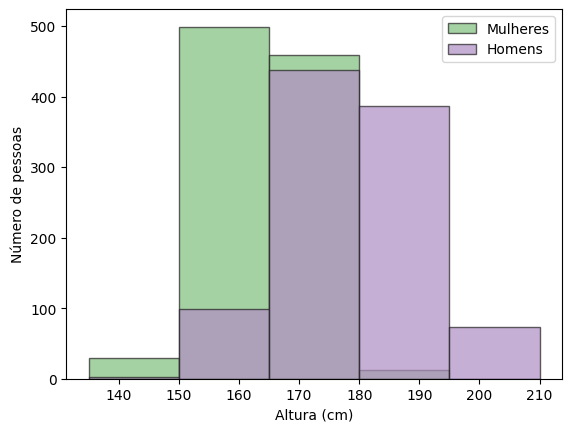

In [ ]:
hist , bins , patches = plt.hist(altura_mulheres, bins=5,
                                 range=(135, 210),
                                 color='#7fbf7b',
                                 edgecolor='#202020',
                                 label='Mulheres',
                                 alpha=0.7)

hist , bins , patches = plt.hist(altura_homens, bins=5,
                                 range=(135, 210),
                                 color='#af8dc3',
                                 edgecolor='#202020',
                                 label='Homens',
                                 alpha=0.7)

plt.legend()

plt.xlabel('Altura (cm)')
plt.ylabel('Número de pessoas')

Text(0, 0.5, 'Número de pessoas')

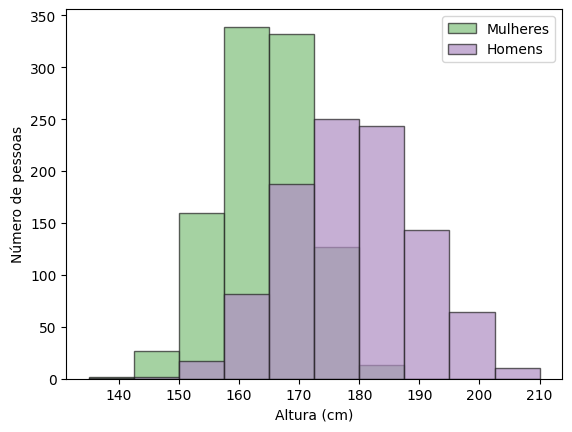

In [ ]:
hist , bins , patches = plt.hist(altura_mulheres, bins=10,
                                 range=(135, 210),
                                 color='#7fbf7b',
                                 edgecolor='#202020',
                                 label='Mulheres',
                                 alpha=0.7)

hist , bins , patches = plt.hist(altura_homens, bins=10,
                                 range=(135, 210),
                                 color='#af8dc3',
                                 edgecolor='#202020',
                                 label='Homens',
                                 alpha=0.7)

plt.legend()

plt.xlabel('Altura (cm)')
plt.ylabel('Número de pessoas')

In [ ]:
mu_h,sigma_h = np.mean(altura_homens), np.std(altura_homens)
mu_m,sigma_m = np.mean(altura_mulheres), np.std(altura_mulheres)

print("Altura média +- desvio:")
print(f"Mulheres:{mu_m:.1f}+-{sigma_m:.1f}")
print(f"Homens..:{mu_h:.1f}+-{sigma_h:.1f}")

Altura média +- desvio:
Mulheres:164.1+-7.4
Homens..:178.8+-10.8


Text(0, 0.5, 'Número de pessoas')

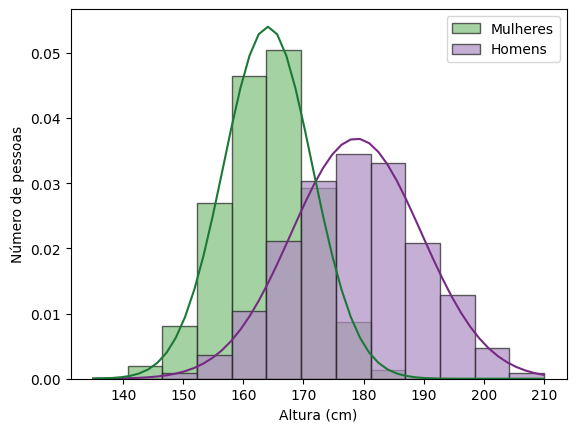

In [ ]:
hist , bins , patches = plt.hist(altura_mulheres, bins=13,
                                 range=(135, 210),
                                 color='#7fbf7b',
                                 edgecolor='#202020',
                                 label='Mulheres',
                                 alpha=0.7,
                                 density=True)

hist , bins , patches = plt.hist(altura_homens, bins=13,
                                 range=(135, 210),
                                 color='#af8dc3',
                                 edgecolor='#202020',
                                 label='Homens',
                                 alpha=0.7,
                                 density=True)

plt.legend()

x = np.linspace(135, 210)
yh = np.exp(-(x-mu_h)**2/(2*sigma_h**2))/(np.sqrt(2*np.pi*sigma_h**2))
ym = np.exp(-(x-mu_m)**2/(2*sigma_m**2))/(np.sqrt(2*np.pi*sigma_m**2))

plt.plot(x,yh,color='#762a83')
plt.plot(x,ym,color='#1b7837')

plt.xlabel('Altura (cm)')
plt.ylabel('Número de pessoas')

## Polinômios

O numpy fornece um conjunto de classes para representar polinômios (de vários tipos) e também métodos relacionados a álgebra, cálculo, cálculo de raízes e ajuste.

### Definindo e avaliando polinômios

Vamos começar com o caso mais simples de uma série finita de potências de $x$:


$$
\begin{split}
P(x) &= c_0+c_1 x + c_2 x^2 +\dots c_N x^N\\
P(x) &= \sum_{i=0}^{N}c_i x^i
\end{split}
$$

In [ ]:
#classe do numpy que implemente esse tipo de objeto
from numpy.polynomial import Polynomial

Por exemplo, para definir:

$$
P(x)=6-5x+x^2
$$
fazemos

In [ ]:
p = Polynomial(coef=[6 , -5, 1])

In [ ]:
p

In [ ]:
print(p)

In [ ]:
p.coef

In [ ]:
#para avaliar p
p(4)

In [ ]:
#são vetorizados
x = np.linspace(-5, 5, 11)
p(x)

In [ ]:
x = np.linspace(-10, 10, 100)
plt.plot(x,p(x))

### Algebra com polinômios

Supondo:

$$
P(x)=6-5x+x^2
$$

e
$$
Q(x) = 2 -3x
$$

definidos usando a classe `Polynomial` do numpy, podemos usar os operadores padrões do Python:

In [ ]:
p = Polynomial(coef=[6 , -5, 1])
q = Polynomial(coef=[2, -3])

print("p =",p)
print("q =",q)

In [ ]:
p+q

In [ ]:
p-q

In [ ]:
p*q

In [ ]:
p//q

In [ ]:
p % q

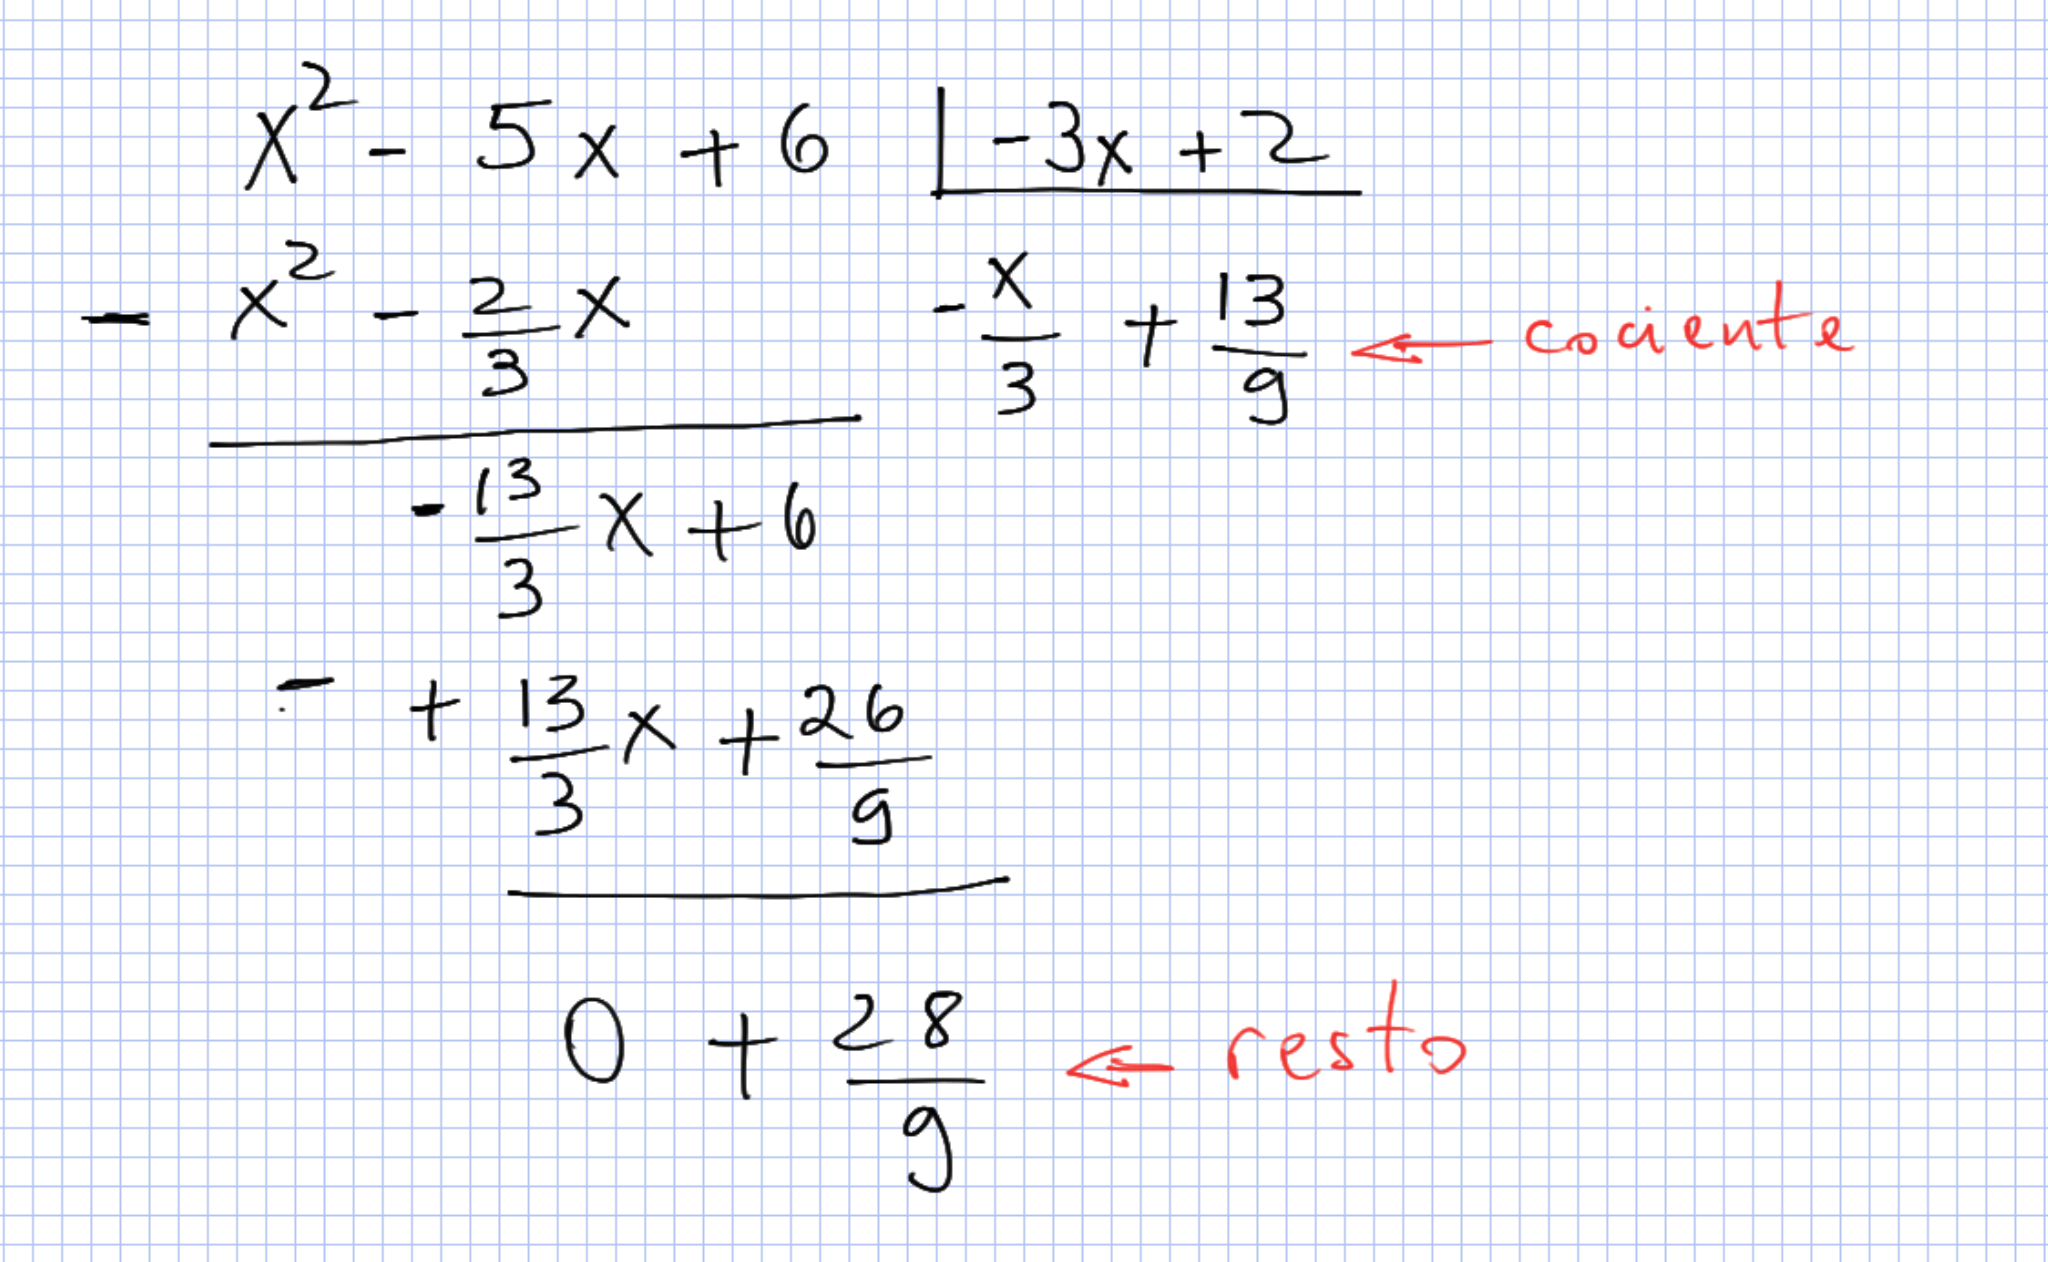

In [ ]:
13/9.,1/3.,28/9.

In [ ]:
quociente, resto = divmod(p, q)

In [ ]:
quociente

In [ ]:
resto

In [ ]:
q

In [ ]:
#exponenciação
q**2

In [ ]:
#multiplicação por escalar
q*2

In [ ]:
#divisão por escalar
q/2

In [ ]:
#multiplicação por tupla de coefs.
q*[2,3]
#(2-3x)*(2+3x) = 4-9x**2

In [ ]:
p

In [ ]:
q

In [ ]:
#podemos ainda calcular p(q(x))

p(q)

### Raízes de polinômios

Para isso usamos o método `.roots`

In [ ]:
q.roots()

In [ ]:
p.roots()

In [ ]:
p(q).roots()

In [ ]:
s = Polynomial([4 , 0, 1])
s


In [ ]:
s.roots()

In [ ]:
#podemos criar um polinômio passando suas raízes

In [ ]:
s1 = Polynomial.fromroots([-2j, +2j])
s1

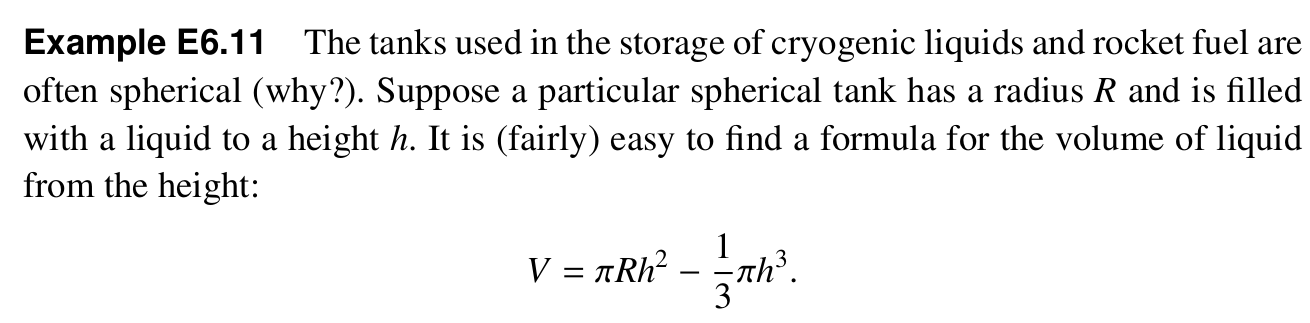

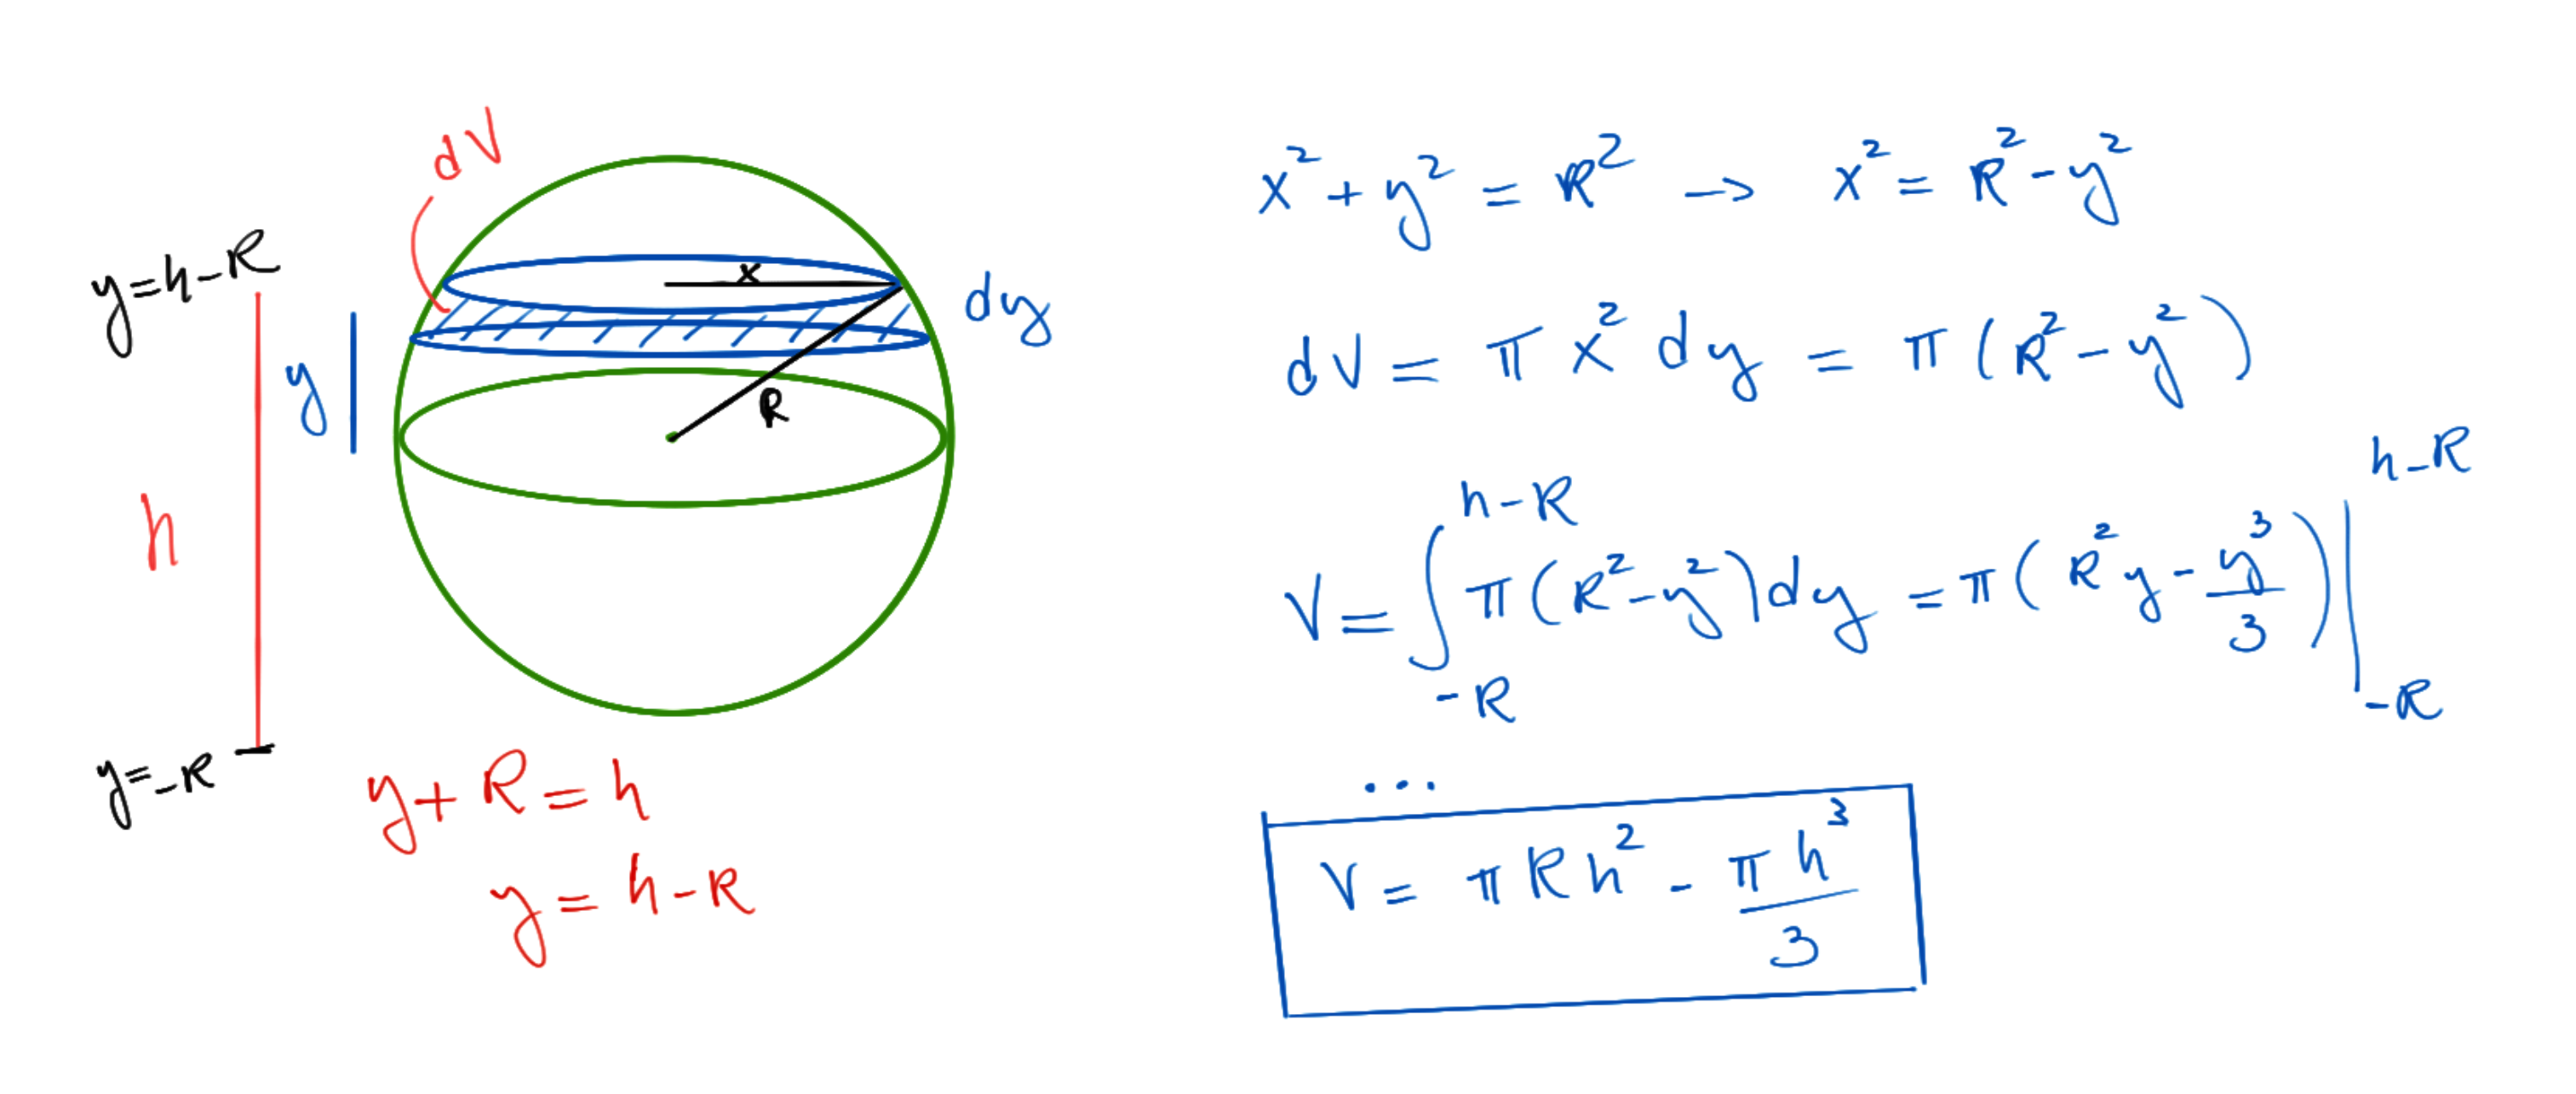

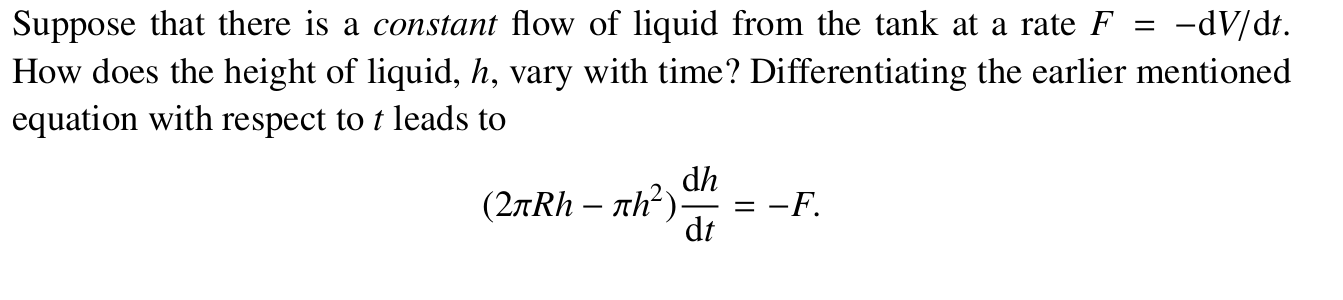

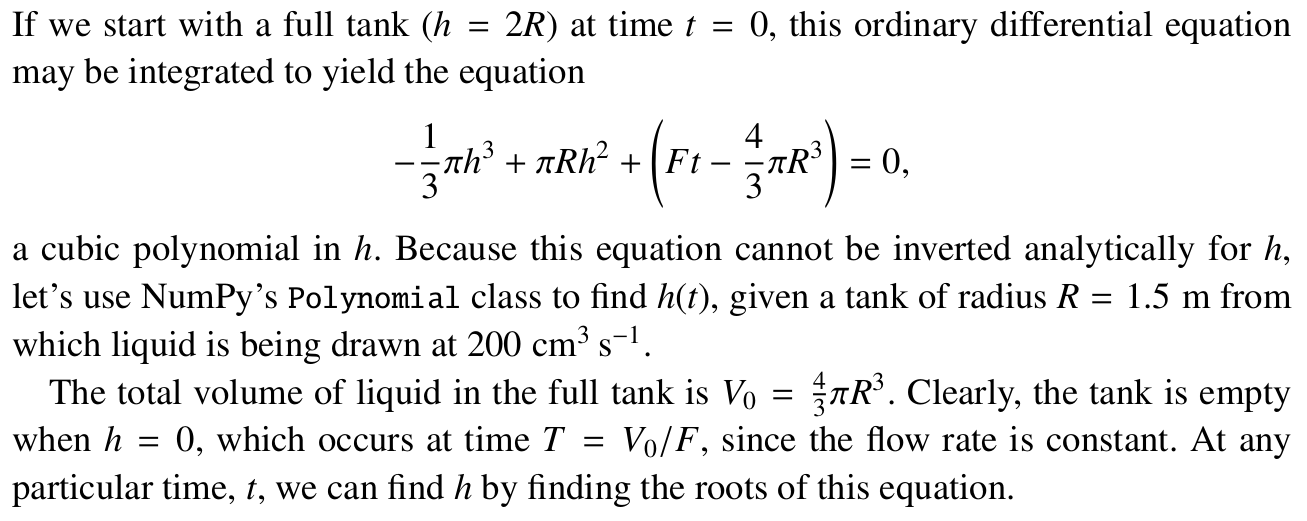

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
Polynomial  = np.polynomial.Polynomial

# raio do tanque (m)
R = 1.5
# fluxo, m^3.s-1
F = 2.e-4
# volume total
V0 = 4/3 * np.pi * R**3
# tempo para esvaziar
T = V0 / F

# coeficientes c2 e c3 do polinômio p(h)
c2, c3 = np.pi*R, -np.pi / 3

N = 100

# array com os valores de tempo t entre 0 e T
time = np.linspace(0, T, N)
# array para as alturas em cada tempo
h = np.zeros(N)

for i, t in enumerate(time):
    c0 = F*t - V0 #coeficiente c0 (o único que varia no tempo)
    p = Polynomial([c0, 0, c2, c3])
    # calcula as raízes
    roots = p.roots()
    # filtra as raízes no intervalo 0 <= h <= 2R
    h[i] = roots[(0 <= roots) & (roots <= 2*R)][0]

plt.plot(time, h, 'o')
plt.xlabel('Tempo (s)')
plt.ylabel('Altura (m)')

### Cálculo com polinômios

In [ ]:
p = Polynomial(coef=[6 , -5, 1])
q = Polynomial(coef=[2, -3])

In [ ]:
p

In [ ]:
q

In [ ]:
p.deriv()

In [ ]:
p.deriv(2)

In [ ]:
p.deriv(3)

In [ ]:
q.integ()

In [ ]:
q.integ(2)

In [ ]:
#lbnd=limite inferior de integração (0 por padrão)
q.integ(lbnd=1)

### Polinômios ortogonais

Além a representação em séries de potência que usamos até agora, o numpy fornece classes para implementar outros tipos de polinômios:

- `Chebyshev`
- `Legendre`
- `Laguerre`
- `Hermite`

Muitos desses polinômios vão aparecer ao longo do curso. Aqui vamos ilustrar o uso com os polinômios de Legendre. Esses polinômios surgem em diversos contextos, por exemplo, soluções da equação de Schrödinger para o átomo de hidrogênio ou na expansão multipolar do potencial elétrico.

Eles são definidos como a as soluções para a equação diferencial de Legendre:

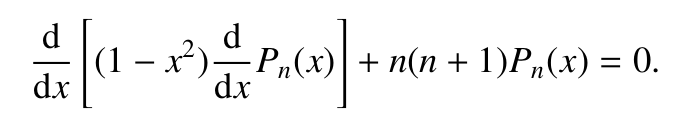

Os primeiros polinômios de Legendre são:

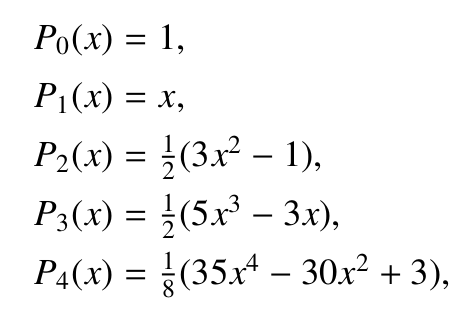

In [ ]:
from numpy.polynomial import Legendre

In [ ]:
Legendre(coef=[1])

In [ ]:
A = Legendre(coef=[1,1,1])

In [ ]:
#podemos converter
A.convert(kind=Polynomial)

In [ ]:
A.roots()

In [ ]:
#podemos criar um Legendre usando um Polynomial
P = Polynomial([0 , 1, 1])
P

In [ ]:
Q = Legendre.cast(P)
Q
#representa a combinação de ps de Legendre

In [ ]:
Q.convert(kind=Polynomial)

In [ ]:
# são a mesma função
P(-4),Q(-4)

In [ ]:
#para criar um polinômio da base (P3)
P3 = Legendre.basis(3)
P3

In [ ]:
P3.convert(kind=Polynomial)

In [ ]:
x = np.linspace(-1,1)

for i in range(5):
    y = Legendre.basis(i)(x)
    plt.plot(x,y,label=f"$P_{{{i}}}(x)$")
plt.legend()
#notar a paridade

### Ajuste de polinômios

Um uso comum para polinômios é o ajuste e a aproximação de séries de dados.

Os polinômios do numpy oferecem uma função `fit` que implementa um ajuste por método do mínimos quadrados, conforme veremos mais abaixo.

**Atributos `domain` e `window`**

- `domain` ou domínio é a região ao longo do eixo $x$ que deve ser aproximada pelo polinômio.

Vale observar que qualquer polinômio diverge para $x\to\pm\infty$, o que pode tornar ajustes de polinômio um problema mal posto por conta de instabilidades numéricas.

- `window` ou janela de um polinômio representa o intervalo de valores de $x$ para o qual as combinações lineares das potências do polinômio são ótimas para fazer ajustes. Por exemplo, para os polinômios de Legendre, essa janela é $[-1,1]$.

O função `fit` ajusta a `window` do polinômio para o `domain` dos dados de maneira automática. Por exemplo:



In [ ]:
x = np.linspace(100,100.1)
f = lambda x: np.exp(-np.sin(40*x))

In [ ]:
plt.plot(x,fx)

In [ ]:
p4 = Polynomial.fit(x,f(x),4)
print(p4)

In [ ]:
p4

In [ ]:
p4.domain, p.window

In [ ]:
plt.plot(x,f(x))
plt.plot(x,p4(x))

Vale notar que ao criar um polinômio usando a classe `Polynomial`, `domain` e `window` são definidos por padrão como $(-1,1)$. Vejamos:

In [ ]:
p4.coef

In [ ]:
q4 = Polynomial(p4.coef)
q4

In [ ]:
q4.domain, q4.window

In [ ]:
#são valores diferentes
q4(100),p4(100)

As função que faz esse mapeamento de $x$ no domínio $(a,b)$ para $x'$ na janela $(a',b')$ é

$$
x' = \chi + \mu x
$$

com

$$
\mu=\frac{b'-a'}{b-a}
$$

e
$$
\chi = b' - b \frac{b'-a'}{b-a}
$$



In [ ]:
#para acessar esse parâmetros
chi, mu = p4.mapparms()
chi, mu

In [ ]:
q4(chi+100*mu),p4(100)

In [ ]:
#podemos mudar o domain
q4.domain = np.array((100., 100.1))

In [ ]:
#agora os valores são iguai
q4(100),p4(100)

In [ ]:
#linspace com polinômios
p4.linspace(5)

In [ ]:
p4.domain

**`Polynomial.fit`**

Conforme já usamos, essa função retorna o polinômio $p(x)$ de grau `deg` ajustado a um dado $y$ (array) de modo a minimizar a soma dos erros quadrados:


$$
E = \sum_i |y_i-p(x_i)|^2
$$

Por exemplo,

In [ ]:
x = np.linspace(400, 700, 1000)
y = 1.*x**(-4)

In [ ]:
p = Polynomial.fit(x, y, deg=3)

In [ ]:
print(p)

In [ ]:
plt.plot(x,y,label='$f(x)=x^{-4}$')
plt.plot(x,p(x),label='melhor ajuste cúbico')
plt.legend()

Para verificar a qualidade do ajuste, podemos usar o argumento `full=True`:

In [ ]:
deg = 2
p, [resid , rank, sing_val, rcond] = Polynomial.fit(x, y, deg, full=True)

In [ ]:
print(p)

In [ ]:
resid

$$
\text{resid} = \sum_i |y_i-p(x_i)|^2
$$

Quanto menor o `resid` (resíduo), melhor o fit.

In [ ]:
deg = 3
p, [resid , rank, sing_val, rcond] = Polynomial.fit(x, y, deg, full=True)
resid

Os outros parâmetros têm relação com o [método de mínimos quadrados](https://en.wikipedia.org/wiki/Ordinary_least_squares).

*Exemplo E6.12:* Ajuste de uma função linear.

Os dados abaixo mostram a *absorbância* $A$ ao longo de uma caminho de $l=5$ mm de luz ultravioleta (280 nm) por uma proteína como função de sua concentração $P$ em uma solução.

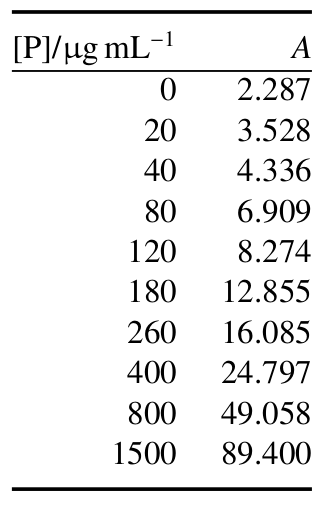

A absorbância $A$ é esperada ser uma função linear da concentração, uma relação normalmente chamada de [lei de Beer-Lambert](https://en.wikipedia.org/wiki/Beer%E2%80%93Lambert_law):

$$
A = \epsilon\, l P + A_0
$$

sendo $\epsilon$ a *absortividade* do material e $A_0$ a absorbância devido apenas à solução.



In [ ]:
concentracao = np.array([0, 20, 40, 80, 120, 180, 260, 400, 800, 1500])
absorbancia  = np.array([2.287, 3.528, 4.336, 6.909, 8.274, 12.855,
                         16.085, 24.797,49.058, 89.400])

In [ ]:
plt.plot(concentracao, absorbancia,'o',
         ms=10,markeredgecolor='#303030')

In [ ]:
cmin, cmax = min(concentracao), max(concentracao)

pfit, [resid , rank, sing_val, rcond] = Polynomial.fit(concentracao,absorbancia,
                                                       deg=1, full=True,
                                                       window=(cmin, cmax),
                                                       domain=(cmin, cmax))

pfit

In [ ]:
resid

In [ ]:
#Root-mean-square deviation
rms = np.sqrt(resid[0]/len(concentracao))
rms

In [ ]:
plt.plot(concentracao, absorbancia,'o',
         ms=10,markeredgecolor='#303030')
plt.plot(concentracao, pfit(concentracao),'--',
         lw=3,color='#202020')

plt.xlabel('Concetração, $P$ ($\mathrm{\mu g\cdot mL^{-1}}$)')
plt.ylabel('Absorbância, $A$')

In [ ]:
pfit.coef

In [ ]:
pfit.coef[1]/5 #mL⋅mol−1⋅mm−1

Esse número representa o [*molar attenuation coefficient*](https://en.wikipedia.org/wiki/Molar_absorption_coefficient) ou a *absortividade*  $\epsilon$ do material.